# 592B Class 1.2 (09/05). Sampling sinuosidal signals. (also doubles as Problem Set 1)

In this class, we'll get used to some basic things in Python and jupyter notebooks while learning to work with simple digital signals. Note: this notebook has been written using Python 3.6.

**Before you work through this notebook, you should:**

- *Familiarize yourself with python, jupyter notebooks, and basic plotting*: work through Software Carpentry's [Plotting and Programming in Python tutorial](http://swcarpentry.github.io/python-novice-gapminder/), up through Section 9 on plotting
- *Make sure you understand analog to digital conversion of speech signals*: review the Class 1.2 ([slides](https://ling592b.krisyu.org/slides/592B-S18_1-2.pdf)) and watch the [sampling video lecture](https://wordpress.krisyu.org/wp-admin/admin-ajax.php?action=h5p_embed&id=5), the [quantization video lecture](https://wordpress.krisyu.org/wp-admin/admin-ajax.php?action=h5p_embed&id=6), and also the video lecture on [quantization and bits](https://youtu.be/K5VhfFoCIIs).
- *Familiarize yourself with version control with Git*: work through Software Carpentry's [Version Control with Git tutorial](https://swcarpentry.github.io/git-novice/). Don't forget to follow their instructions for [setup](https://carpentries.github.io/workshop-template/#git)!
---

## What is a notebook?

A juPyter notebook is described [here in the official docs](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html#what-is-the-jupyter-notebook):

> Notebook documents (or “notebooks”, all lower case) are documents produced by the Jupyter Notebook App, which contain both computer code (e.g. python) and rich text elements (paragraph, equations, figures, links, etc...). Notebook documents are both human-readable documents containing the analysis description and the results (figures, tables, etc..) as well as executable documents which can be run to perform data analysis.

Writing code in a notebook like this follows the principles of [literate programming](http://www.literateprogramming.com/knuthweb.pdf), coined and popularized by [Donald Knuth](http://www-cs-faculty.stanford.edu/~knuth/). The idea is that you don't want to write *unstructured code*: the *documentation* of the code is just as (or more important) than the code itself. As Donald Knuth [puts it](http://www.literateprogramming.com/knuthweb.pdf): 

> I believe that the time is ripe for significantly better documentation of programs, and that we can best achieve this by considering programs to be works of literature.  Hence, my title: “Literate Programming.”
Let us change our traditional attitude to the construction of programs: Instead of imagining that our main task is to instruct a computer what to do, let us concentrate rather on explaining to human beings what we want a computer to do.

## Importing libraries

See Software Carpentry's Plotting and Programming in Python tutorial section on [libraries](http://swcarpentry.github.io/python-novice-gapminder/06-libraries/). As it says there, we use the `import` command to "load a library module into a program’s memory." 

We are going to define some sinusoidal signals and then plot them. To do this, we'll load two commonly used libraries:

- `matplotlib` for plotting (see [Section 9 on plotting](http://swcarpentry.github.io/python-novice-gapminder/09-plotting/) from the Software Carpentry tutorial for more info
- `numpy` for doing numerical computations efficiently (see Software Carpentry's [Programming with Python tutorial](https://swcarpentry.github.io/python-novice-inflammation/) for more on `numpy`

We'll give the sub-library `matplotlib.pyplot` the alias `plt` and `numpy` the alias `np`.


In [5]:
import matplotlib.pyplot as plt 
import numpy as np 

# from __future__ import division  (if you're using Python 2.7+, to make float division the default)

## The mathematical definition of sinusoidal functions

A standard definition of a sinusoidal signal (i.e., a sine wave) is given as function of time $t$:

$$y(t) = A \sin (\omega t + \phi) $$

where:
- $A$ is the amplitude
- $\omega$ is the angular frequency, n.b., $\omega = 2\pi f$ (where $f$ is the frequency in cycles per second (Hertz or Hz))
- $\phi$ is the phase shift 

In particular, let's define:
$$y_1(t) = \sin \left(880\pi t\right) $$
$$y_2(t) = 0.5 \sin \left(440\pi t + \frac{\pi}{2} \right) $$

***Exercise 1: What are $A$, $\omega$, $f$ and $\phi$ for $y_1(t)$ and $y_2(t)$?***

***Exercise 2: Recall that the period of a sinusoid (the duration of one cycle) is defined as $T = 1/f$. What is the period of $y_1(t)$? What is the period of $y_2(t)$?***

**Enter your code and/or answers for Exercise 1 and 2 in the cell below. Create additional cells if you need them.**

We've now mathematically defined two sinusoidal functions, $y_1(t)$ and $y_2(t)$. To represent these as sinusoidal signals in a computer though, we'll need to represent them **digitally**, in discrete time. We'll also need to define a finite duration for each signal, since computers only have finite memory: we can't define a signal that goes on forever!

## Digital signals

Note that our mathematical definitions of the sinusoidal signals $y_n(t)$ treat them as continuous-time, **analog** signals. This means, that in

$$y(t) = A \sin (\omega t + \phi) $$

time $t \in \mathbb{R}$, i.e., time $t$ can be any real-valued number. 
 
But as we discussed in Class 1.1 ([slides](https://ling592b.krisyu.org/slides/592B-S18_1-2.pdf)) and in the [sampling video lecture](https://wordpress.krisyu.org/wp-admin/admin-ajax.php?action=h5p_embed&id=5), when speech signals are represented in a computer they are represented as discrete-time, **digital** signals, as schematized in the [images](http://www.wlxt.uestc.edu.cn/wlxt/ncourse/dsp/web/kj/Chapter2/2.1%20Discrete-Time%20Signals%20Time-Domain%20Representation.htm) below.

In the image below, an analog signal $x_a(t)$ ($a$ for "analog") is sampled with a **sampling interval** of $T$ (and corresponding **sampling rate** or **sampling frequency** ($f=1/T$). 

*Note: caution here, we also used $T$ as the variable for a period of a sinusoid and $f$ as the frequency of a sinusoid earlier. To be absolutely clear, we'll add a subscript "s" when we're talking about sampling, "s" is for "sampling". So, let's call the sampling frequency $f_s$ and the sampling interval $T_s$.*

![Sampled continuous-time signal](http://www.wlxt.uestc.edu.cn/wlxt/ncourse/dsp/web/kj/Chapter2/2.1%20Discrete-Time%20Signals%20Time-Domain%20Representation_files/image004.jpg)

The sampled signal shown below, $x[n]$, is a discrete-time signal, where a sampled timepoint is represented as a sample $n$, where $n$ is an integer, $n \in \mathbb{Z}$.

![Discrete-time signal](http://www.wlxt.uestc.edu.cn/wlxt/ncourse/dsp/web/kj/Chapter2/2.1%20Discrete-Time%20Signals%20Time-Domain%20Representation_files/image002.jpg)

Recall we also discussed how a digital speech signal is *quantized* or "sampled in amplitude" as well as in time (See [quantization video lecture](https://wordpress.krisyu.org/wp-admin/admin-ajax.php?action=h5p_embed&id=6), and also the video lecture on [quantization and bits](https://youtu.be/K5VhfFoCIIs)). We won't get more into that at the moment, and focus on sampling in time for now.

## Defining and plotting sinusoidal signals with `numpy` and `matplotlib`

We'll use `numpy` functions to help us define $y_1(t)$ and $y_2(t)$. Then we'll use `matplotlib` to plot them. 

### Defining the vector of sampled timepoints

First, we need to define the [vector](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/vector-introduction-linear-algebra) of sampled timepoints, $\bf x$. For example, in the figure above, this would be the sequence of numbers from -10 to 17, with a sampling interval $T_s$ of 1 (let's say $t$ is in seconds, so $T_s = 1s$):

$$\bf x = \langle -10, -9, -8, \ldots, -1, 0, 1, 2, 3, \ldots, 16, 17\rangle$$

Later when we work with Fourier transforms, we'll see that the total number of samples in a sampled signal is an important quantity. We also need to know the total number of samples for defining the vector to define $\bf x$ using `np.linspace`. So you should become fluent in computing this. If we know $T_s$ and start point $t_{start}$ and stop point $t_{stop}$ of the sampled timepoints, that's straightforward to determine. We just compute how long the duration of the signal is, which is $t_{stop} - t_{start}$. Then we know that is divided evenly into intervals of $T_s$. So if we do $(t_{stop} - t_{start})/T_s$, we get the total number of sampling intervals. To get the total number of sampled timepoints, we just add one to the total number of sampling intervals. 

(If this is still confusing to you, it might help if you think of a simple example, e.g., suppose we have the sampling timepoints $\langle 0, 1, 2 \rangle $. $t_{start}$ is 0s, $t_{stop}$ is 2s, and $T_s$ is 1s.  Then $(t_{stop} - t_{start})/T_s = (2-0)/1 = 2$. So there are 2 sampling intervals. If there are two sampling intervals, then there are three sampled timepoints. And that's right: there are indeed three--they are at 0, 1, and 2s.)

Doing this computation, in the code chunk below, gives us the answer that there are 28 sampled time points. 

**Note: in practice, with the sampling rates and signal durations you see in speech processing, this difference can be pretty neglible. So you will see researchers/textbooks which ignore this difference and don't bother to add one, e.g., they would get 27 samples for this example.**

In [3]:
Ts = 1 # sampling interval is 1 second
t_start = -10 # First sampled timepoint is at -10s (let's say that's 10s before the concert starts)
t_stop = 17 # Last sampled timepoint is at 17s (let's say this is 17s after the concert starts)

ns = (t_stop - t_start) / Ts + 1 # compute number of sampled timepoints
print(ns)



28.0


We can also think of this computation from the perspective of the sampling freqency $f_s$, recalling that $f_s = 1/T_s$. The sampling frequency is the number of samples taken per second. The duration $t_{stop} - t_{start}$ is how many seconds long the signal is. From this perspective, the total number of samples $n_s$ is the product of the duration and the sampling frequency plus one: $n_s = (t_{stop} - t_{start}) \cdot f_s + 1$. This computation is identical to the one immediately above, since $f_s = 1/T_s$. Why the plus 1? You need that plus 1 because we have to be sure to include the initial sampled timepoint at $t=0$.

In [4]:
fs = 1/Ts # sampling frequency

ns = (t_stop - t_start) * fs + 1
print(ns)

28.0


Now, let's get back to $y_1(t)$ and $y_2(t)$. Say we choose to have a sampling rate $f_s=100\,Hz$ for digitally representing $y_1(t)$ and $y_2(t)$. And let's say that the signals are each 10 seconds long, so let's have our sampled time points run from $t=0$ to $t=10$. That means we'll need to create a vector of values going from 0 to 10, with a sampling interval $T_s$ corresponding to $f_s=100$.

***Exercise 3: what is the corresponding sampling interval $T_s$, if the sampling rate $f_s$ is 100 Hz? How many sampled timepoints are there for $y_1(t)$? How many sampled timepoints are there for $y_2(t)$?***

**Enter your code and/or answers for Exercise 3 in the cell below. Create additional cells if you need them.**


We'll use Numpy's `linspace` function to define the vector $\bf{x}$ of sampled time points. We'll pass in the start time $t_{start}$, the stop time $t_{stop}$, as well as the total number of samples, $n_s$. 

In [15]:
fs = 100 # define the sampling rate, f_s = 100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  10 # We stop sampling at t = 10s

ns = (t_stop - t_start) * fs + 1

x = np.linspace(t_start, t_stop, ns)

Note: in this course, I'll use `np.linspace` as shown above, but you might also see people use Numpy's `np.arange` function to define the vector $\bf{x}$ of sampled time points. For completeness, I'll also show you how to do this: pass in the start time $t_{start}$, the stop time $t_{stop}$, as well as the sampling interval $T_s = 1/f_s$. One tricky bit is that `np.arange` generates values in the range $[t_{start},t_{stop})$, i.e., it doesn't include $t_{stop}$. So we'll pass in the stop time as $t_{stop} + 1/f_s$, so that the last value generated will be $t_{stop}$. (Some people won't bother to do this, so you might also see $t_{stop}$ passed in as the stop value).

In [16]:
#help(np.arange) #Uncomment this to get documentation on np.arange

fs = 100 # define the sampling rate, f_s = 100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  10 # We stop sampling at t = 10s

ns = (t_stop - t_start) * fs + 1

x_arange = np.arange(t_start, t_stop + 1/fs, 1/fs) # Define vector of sampled time points


Hurray! We've defined the vector $\bf x$ of sampled time points for $y_1(t)$ and $y_2(t)$

***Exercise 4: use a python function to determine the length of $\bf x$. This is the number of sampled time points. Hint: if you don't know how to do this, make sure you review [this section](https://swcarpentry.github.io/python-novice-gapminder/02-variables/) in the Python plotting and programming tutorial. How does your answer here compare with your answer from Exercise 3?***

**Enter your code and/or answers for Exercise 4 in the cell below. Create additional cells if you need them.**


### Defining the amplitude values for the sampled time points

Now we need to define the amplitude values for the sampled time points. We can do this using Numpy's `np.sin` and `np.pi` functions and the vector of sampled timepoints we already defined, `x`.


In [17]:
f1 = 440 # frequency of y_1(t)
f2 = 220 # frequency of y_2(t)

y1 = np.sin(2*np.pi*f1*x)
y2 = np.sin(2*np.pi*f2*x)

## Plotting the sampled sinusoidal signals

Now we can plot the sampled $y_1(t)$ and $y_2(t)$ using `matplotlib` commands. Recall that we set `plt` as an alias for `matplotlib`.

Text(0, 0.5, 'Amplitude (dB)')

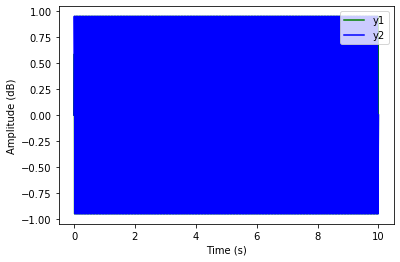

In [18]:
plt.plot(x , y1, "-g", label="y1") # plot (x,y1) as a green line
plt.plot(x , y2, "-b", label="y2") # plot (x,y2) as a blue line
plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')


Uh-oh...that doesn't look like what we want! The frequency of the sinusoidal signals are so high, that we need to zoom in a lot more to see what's going on. To do this, let's set the x-axis over the interval [0,0.3] (so just the first 0.3 seconds of the signal) and try again.

Text(0, 0.5, 'Amplitude (dB)')

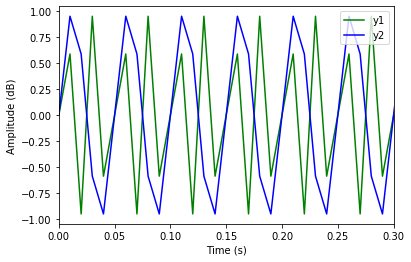

In [19]:
plt.xlim(0,0.3)

plt.plot(x , y1, "-g", label="y1") # plot (x,y1) as a green line
plt.plot(x , y2, "-b", label="y2") # plot (x,y2) as a blue line
#plt.stem(x,y1, 'r', )
plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')


#plt.plot(x,y1)

It's a bit misleading to plot the signals as lines, because they are digital. We can also plot the signals with lollipop plots using `plt.stem`, as shown below.

Text(0, 0.5, 'Amplitude (dB)')

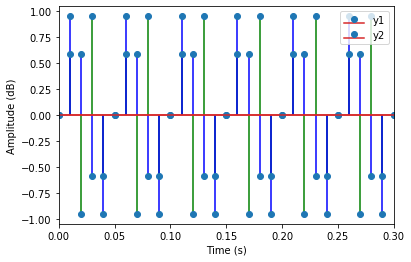

In [21]:
plt.xlim(0,0.3)

plt.stem(x,y1, 'g', label='y1', use_line_collection=True)
plt.stem(x,y2, 'b', label='y2', use_line_collection=True)

plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')



# Listening to digital audio signals

Using our defined sinusoidal signals, we can generate an interactive playable audio object using [IPython.display's Audio module](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)! Let's listen to our sampled $y_1(t)$ and $y_2(t)$ signals. First, though, let's switch to using a sampling rate that's typical for CD quality: 44.1kHz, or 44100 Hz. Note: see this [round-up on a number of ways to read in, write out, and play audio in Python](https://realpython.com/playing-and-recording-sound-python/)--there are a number of ways!

**Exercise 5a: What is the sampling interval $T_s$ if the sampling rate $f_s$ is 44.1 kHz?**

**Exercise 5b: CD quality bit depth is 16-bit. However, nowadays 24-bit audio is [getting more common](http://tweakheadz.com/16-bit-vs-24-bit-audio/). With that bit depth, into how many values is the amplitude range divided up?**

**Enter your code and/or answers for Exercise 5 in the cell below. Create additional cells if you need them.**


In [6]:
from IPython.display import Audio

In [7]:
fs = 44100 # define the sampling rate, f_s = 144100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  3 # We stop sampling at t = 3s

ns = (t_stop - t_start) * fs + 1

x = np.linspace(t_start, t_stop, ns)

f1 = 440 # frequency of y_1(t)
f2 = 220 # frequency of y_2(t)

y1 = np.sin(2*np.pi*f1*x)
y2 = np.sin(2*np.pi*f2*x)

In [8]:
Audio(data=y1, rate=fs)

In [9]:
Audio(data=y2, rate=fs)


We can also generate audio objects for audio files on the web or from file. Here's a horse.

In [10]:
Audio(url="http://www.w3schools.com/html/horse.ogg")


Here's an [American crow caw](http://www.birds.cornell.edu/physics/lessons/elementary/sounds/crow) from The Cornell Lab of Ornithology's website. (I've downloaded this file as `crow.wav` in the current working directory).

In [11]:
Audio('crow.wav')

***Exercise 6: Exploring effects of sampling rate.***

Consider the following sinusoids:

$$sig_1(t) = \sin \left(1046\pi t\right) $$

$$sig_2(t) = \sin \left(1568\pi t\right) $$

1. What are $A$, $\omega$, $f$, $T$ and $\phi$ for $sig_1(t)$ and $sig_2(t)$?
2. Consider the following sampling rates: 44.1 kHz, 4 kHz, 1200 Hz, and 1000 Hz. For each sampling rate, generate a plot showing $sig_1(t)$ and $sig_2(t)$ sampled at that sampling rate (you can do a line plot or a lollipop plot). Make sure that you set the x-axis limits so you can actually have a meaningful visual comparison between the two signals! Describe how the two signals are different, using your plots.
3. Use IPython.display's `Audio` to generate playable audio at each of the sampling rates. Describe how the sampling rate affects how the signals sound, and how the sound of $sig_1$ compares to $sig_2$ at these different sampling rates. 

**Enter your code and/or answers for Exercise 6 in the cell below. Create additional cells if you need them.**


# Addendum: some utility code to generate requirements

From [stack overflow thread](https://stackoverflow.com/questions/40428931/package-for-listing-version-of-packages-used-in-a-jupyter-notebook).

In [29]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to had
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))


In [30]:
for r in requirements:
    print("{}=={}".format(*r))

numpy==1.16.4
matplotlib==3.1.1
